In [48]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,20))

## Download Daily Stock Prices
pandas_datareader is a great library. Currently python API for yahoo finannce and Google Finance both don't work.

In [50]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 12, 21)
yahoo_data = web.DataReader("F", 'yahoo', start, end)
#yahoo_data=yahoo_data.reset_index(None)

## Bolinger Bands
*Bolinger band =  rolling mean +/- 2 x rolling standard deviation*

In [54]:
window=20
yahoo_data['rolling_mean'] = yahoo_data[['Adj Close']].rolling(window=window,center=False).mean()
yahoo_data['rolling_std'] = yahoo_data[['Adj Close']].rolling(window=window,center=False).std()
yahoo_data['lower_band'] = yahoo_data['rolling_mean'] - 2*yahoo_data['rolling_std']
yahoo_data['upper_band'] = yahoo_data['rolling_mean'] + 2*yahoo_data['rolling_std']

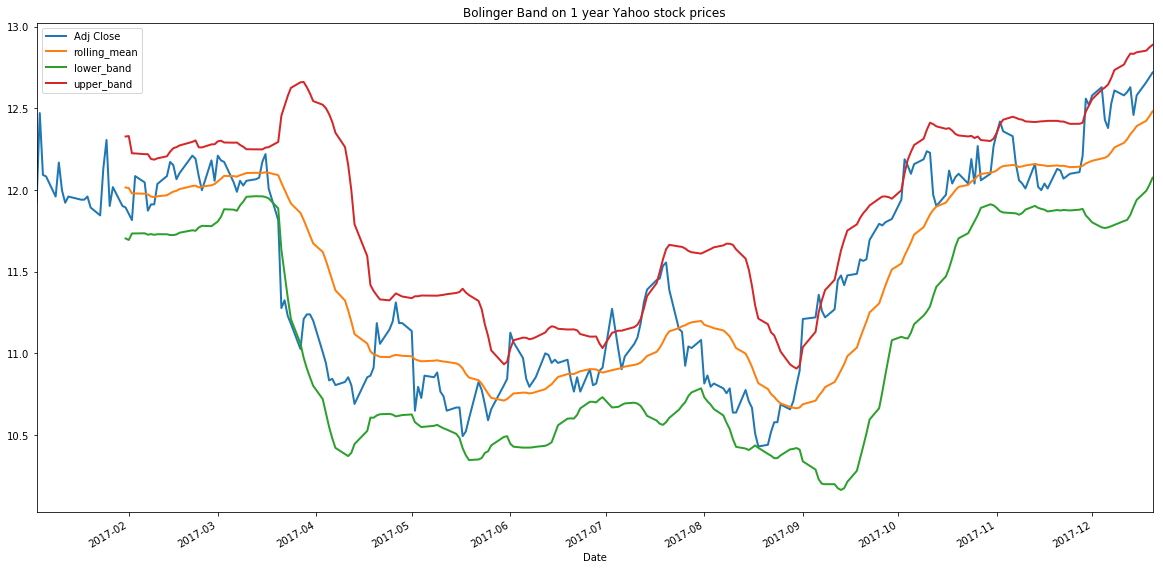

In [64]:
yahoo_data[['Adj Close','rolling_mean','lower_band','upper_band']].plot(figsize=(20,10),lw=2,
                                                            title="Bolinger Band on 1 year Yahoo stock prices")